In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [6]:
file_path = r'C:\Users\LENOVO\Documents\kmeansclusteringgg/Mall_Customers.csv'
df = pd.read_csv(file_path)

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

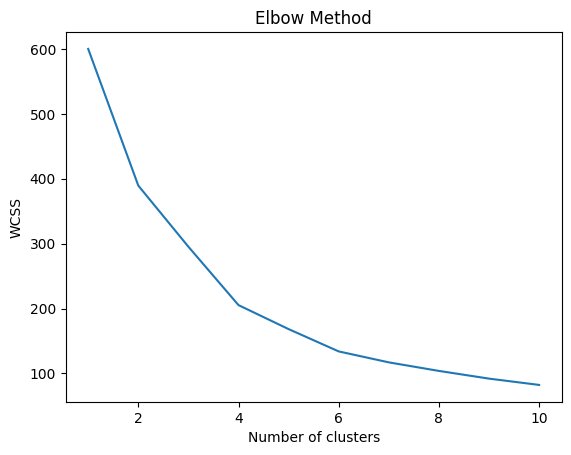

In [12]:
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

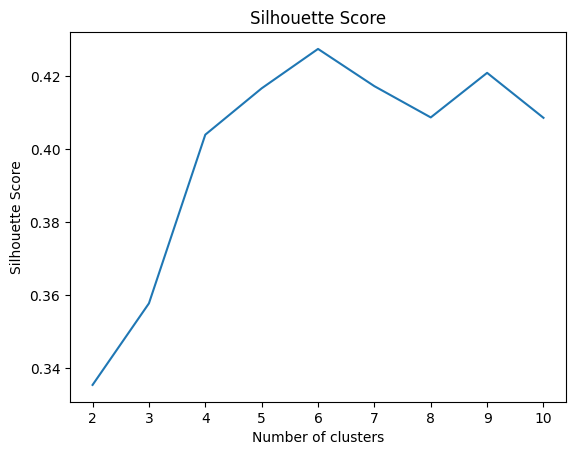

In [14]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

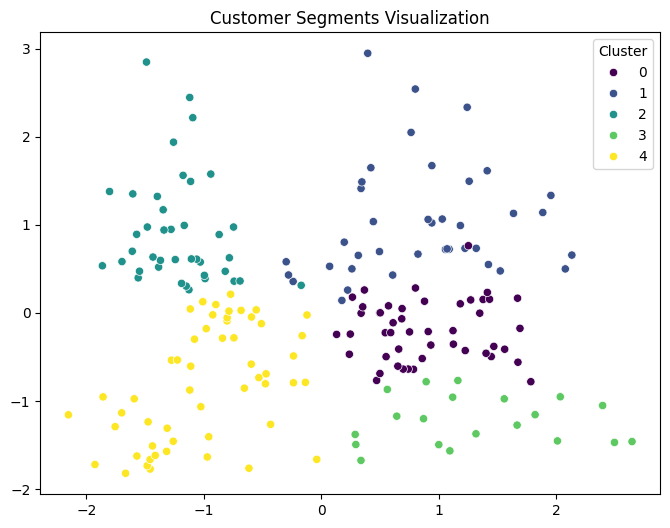

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments Visualization')
plt.show()

In [18]:
numeric_df = df.select_dtypes(include=['number'])
cluster_analysis = numeric_df.groupby(df['Cluster']).mean()
print(cluster_analysis)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         83.872340  55.638298           54.382979               48.851064   
1        159.743590  39.871795           86.102564               19.358974   
2        161.025000  32.875000           86.100000               81.525000   
3         24.100000  46.250000           26.750000               18.350000   
4         55.648148  25.185185           41.092593               62.240741   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  
